In [2]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from IPython.display import Image
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore")

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

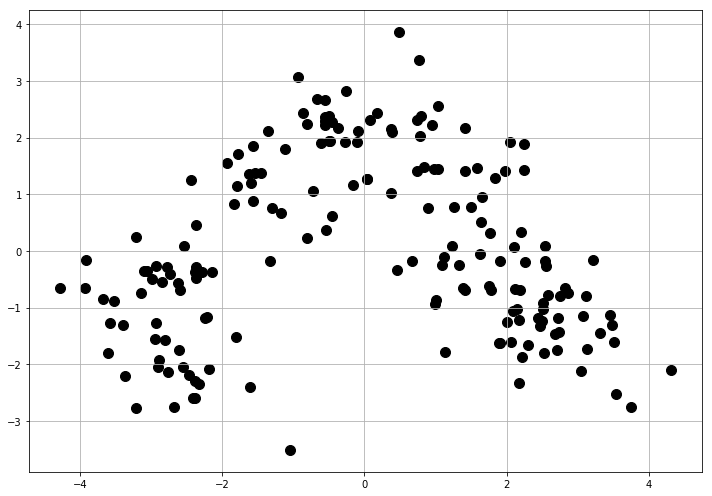

In [3]:
## read data:
df_wine.tail()
X = df_wine.iloc[:,1:].values
y = df_wine.iloc[:,0].values

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
    
# run pca
pca = PCA(n_components=2)
X_pca_scikit = pca.fit_transform(X_std)
    
# make scatter plot
fig,ax=plt.subplots(figsize=(10,7))
plt.scatter(X_pca_scikit[:, 0], X_pca_scikit[:, 1], c='black', marker='o', s=100)
plt.grid()
plt.tight_layout()
plt.show()

### According to the scatter plot above, the components do appear to be in 3 distinct clusters.

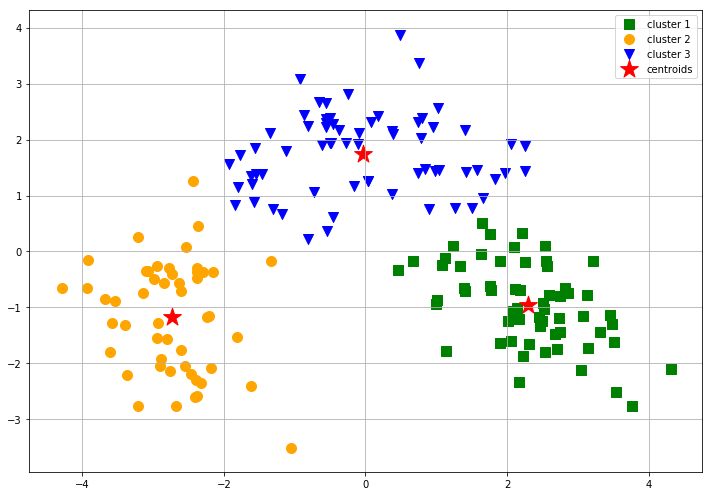

In [6]:
km = KMeans(n_clusters=3, # k=3 clusters
            init='random', 
            n_init=10,    # 10 runs of the k-means algorithm, 
            max_iter=300, # each run is capped at 300 iterations OR
            tol=1e-04,    # tolerance of 0.0001 is reached 
            random_state=0)
y_km = km.fit_predict(X_pca_scikit)

fig,ax=plt.subplots(figsize=(10,7))

plt.scatter(X_pca_scikit[y_km == 0, 0],
            X_pca_scikit[y_km == 0, 1],
            s=100,
            c='green',
            marker='s',
            label='cluster 1')
plt.scatter(X_pca_scikit[y_km == 1, 0],
            X_pca_scikit[y_km == 1, 1],
            s=100,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X_pca_scikit[y_km == 2, 0],
            X_pca_scikit[y_km == 2, 1],
            s=100,
            c='blue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=350,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
# plt.savefig('task2-kmeans.png', dpi=300)
plt.show()

In [9]:
k_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [8]:
# Prep
k_labels = km.labels_  # Get cluster labels
k_labels_matched = np.empty_like(k_labels)

# For each cluster label...
for k in np.unique(k_labels):

    # find and assign the best-matching truth label
    match_nums = [np.sum((k_labels==k)*(y==t)) for t in np.unique(y)]
    k_labels_matched[k_labels==k] = np.unique(y)[np.argmax(match_nums)]

In [5]:
print("The accuracy score for k-means: " + str(accuracy_score(y,k_labels_matched)))

The accuracy score for k-means: 0.9662921348314607


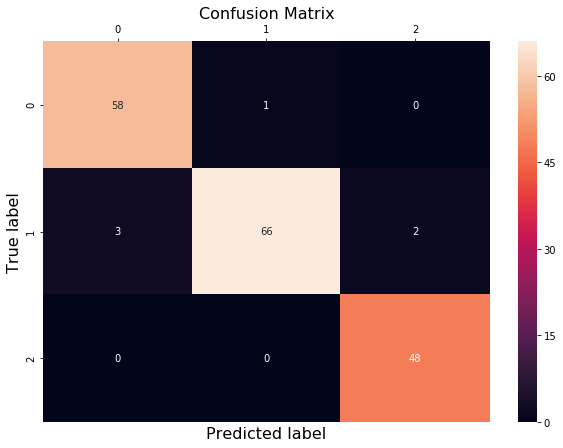

In [16]:
# Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
confmat = confusion_matrix(y, k_labels_matched)

df_cm = pd.DataFrame(
    confmat, index=['0','1','2'], columns=['0','1','2'], 
)

fig = plt.figure(figsize=(10,7))
ax = sns.heatmap(df_cm, annot=True)
ax.xaxis.set_ticks_position('top')
plt.ylabel('True label', fontsize=16)
plt.xlabel('Predicted label', fontsize=16)
plt.title("Confusion Matrix", fontsize=16)
# plt.savefig('task2-confusion.png', dpi=300)
plt.show()

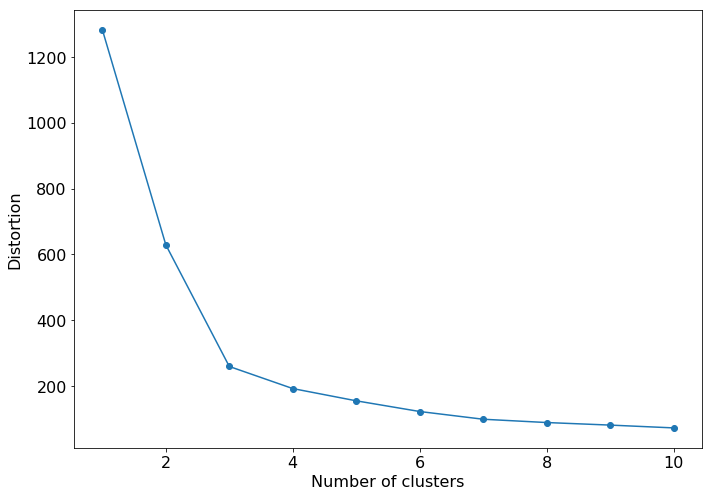

In [8]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_pca_scikit)
    distortions.append(km.inertia_)
fig=plt.subplots(figsize=(10,7))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('Distortion', fontsize=16)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.tight_layout()
plt.show()